<img src="https://i.ibb.co/4JTSd1K/logotipo.gif" width="300"> </img>
# CI2691 Project

# A genetic algorithm to generate art.

Alejandro Menseses. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License </a>  <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a>.

Inspired and based on [Chris Cummins' work](https://chriscummins.cc/s/genetics/#).

# Breve introducción.

Los algoritmos genéticos son una técnica de optimización y búsqueda basada en los principios de la genética y la selección natural que en esencia imitan el proceso de evolución natural que observamos en la vida. Su principio general se basa en el concepto de tener una población inicial compuesta por varios individuos, cada uno representa una solución particular al problema; AG toma una población de individuos (selección aleatoria o predeterminada) y los evoluciona a través de generaciones. Para avanzar de una generación a la siguiente, se implementan tres pasos: Selección, cruce y mutación. Sin embargo, existen otros aspectos importantes que analizaremos a continuación:

## Inicialización

La búsqueda comienza con un población aleatoria de n individuos. Cada uno de estos individuos corresponde a un cromosoma que codifica una secuencia de genes, estos representan una solución particular al problema para el que estamos tratando de optimizar.

## Función fitness (Evaluación)

El fitness de cada individuo es lo que define para que estamos optimizando, de modo que, dado un cromosoma que codifica una solución especifica a un problema, su fitness corresponderá a que tan bien le va a ese individuo en particular como solución al problema. Por lo tanto, cuanto mayor (o menor dependiendo de como el programador realice la comparación) sea su valor fitness más optima será la solución . Estos posteriormente pueden seleccionarce para el cruce.

## Selección 

La selección es el proceso mediante el cual se selecciona una cierta proporción de individuos para aparearse entre si y crear nuevas crias. Hay varias formas de realizar la selección, incluida la Tournament Selection, Elitist Selection y Roulette Wheel Selection. En cada tipo, la base para la selección es el fitness ya que estos tienen mayores posibilidades de sobrevivir para transmitir sus genes en la siguiente generación.

## Cruce (Crossover)

Una vez se han seleccionado los mejores individuos, en este paso se generan nuevas crias que luego reemplazaran a los individuos menos aptos de la población. La idea detras del cruce es que, al combinar diferentes genes se puede producir individuos aún más aptos que serán mejores soluciones a nuestro problema. O no, y en este caso, esas soluciones no sobreviviran a las proximas generaciones.

## Mutación

La mutación es el proceso mediante el cual introducimos nuevo material genético en la población, lo que permite que el algoritmo busque un espacio más grande. Si no fuera por la mutación la diversidad del material genético existente en una población no aumentaria y debido a que algunos individuos "mueren" entre generaciones, en realidad se reduciria y los individuos tendrian a volverse muy similares con bastente rapidez. Por lo que la mutación juega un papel importante en el mantenimiento de la diversidad de la población y esto permite evolucionar hacia soluciones más adecuadas al problema.

En el momento que se une todo, usando los operadores lógicos definidos anteriormente, el algoritmo resuelve el problema.

Fuentes: \\
https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3

https://robologs.net/2015/08/28/como-programar-un-algoritmo-genetico-parte-i-in-theory/





# Funciones de librerías para el manejo de imágenes.

Para habilitar el acceso a nuestro Google Drive debemos de seguir el siguiente tutorial, presionando <a href="https://www.youtube.com/watch?v=9s_JxZv0dvg">aquí</a> (video de Youtube). 

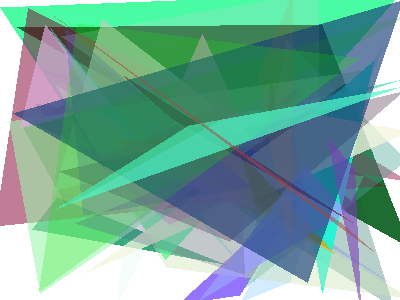

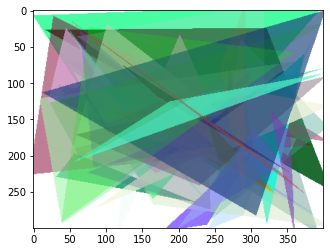

In [ ]:
##### Crear imágenes dibujando polígonos ##### 

# Para esto utilizaremos PIL (Python Imagin Library) esta posee diferentes modulos de Python destinadas 
# al procesamiento de imágenes. Gracias a esto podemos manipular imágenes, crearlas, insertar texto e imágenes.
# Por otro lado, también utilizaremos para visualizar las imágenes, el módulo pyplot de la librería matplotlib.

# importamos de PIL los siguientes módulos
from PIL import Image, ImageDraw

# importamos el modulo pyplot, y lo llamamos plt
import matplotlib.pyplot as plt

# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline

import random

size=(400,300)

# Creando una imagen de tipo RGB con un fondo blanco y tamaño especifico
im = Image.new("RGB", (size[0], size[1]), (255,255,255))

# Crea un objeto que se puede usar para dibujar en la imagen dada.
draw = ImageDraw.Draw(im, "RGBA")

# A continuación utilizaremos la función ImageDraw.polygon( xy , relleno = Ninguno , contorno = Ninguno )
# la cual dado una secuencia de tuplas con valores númericos (Vertices del poligono), un relleno y
# un contorno dibuja un poligono en una imagen. En nuestro caso queremos dibujar triangulos, por lo que 
# sabiendo que estos poseen tres vertices y que ademas pueden tener un relleno definimos las siguientes funciones.

def get_point():

  point = [ (random.randint(-10,size[0] + 10),random.randint(-10,size[1] + 10)),
        (random.randint(-10,size[0] + 10),random.randint(-10,size[1] + 10)),
        (random.randint(-10,size[0] +10),random.randint(-10,size[1] + 10))]
  
  return point

# color[3] nos permite agregar transparencia al poligono que será dibujado. Esto además permite que, los
# triangulos se superpongan entre si dado que todos tendran niveles de transparencias distintos.

def get_color():
  color = (random.randint(0,255),
        random.randint(0,255),
        random.randint(0,255), random.randint(0,255))
  
  return color 

for i in range(50):
  draw.polygon(get_point(), get_color())

# image.save() guarda una imagen en una dirección especifica que se encuente en el Drive  
im.save("/content/drive/MyDrive/Proyecto/test.png")

# Mostrar la imagen (Método 1)
display(im)
print()

# Mostrar la imagen (Método 2)
plt.figure()
plt.imshow(im, vmin=0,vmax=1)

Ejecutar esta celda

In [ ]:
from PIL import Image, ImageDraw, ImageChops, ImageStat
import matplotlib.pyplot as plt
import random
from copy import deepcopy
import requests
import io
import math
import numpy

# Implementación de las funciones

In [ ]:
def cal_pop_fitness_best(target, chromosome):
  """
  Esta función cálcula el fitness de un chromosome dado con respecto a la imagen de referencia. 
  
  Parameters
  ----------
  target : image
      Imagen de referencia para realizar la comparación con la representación fotografica del chromosome dado.
  chromosome : <class 'list'> 
      Chromosome al cual se le quiere calcular su fitness con respecto a la imagen de referencia.

  Returns
  -------
    : float
      Fitness del chromosome dado con respecto a la imagen de referencia.
      
      NOTA. Mientras mas bajo sea el valor fitnees mayor es la semenjanza del chomosoma correspondiente 
      con la imagen de referencia.
  """
    
  return difference(target, get_pic_rep(chromosome, target))

In [ ]:
def difference(im1, im2) -> float:
    """
    Esta función calcula la diferencia entre dos imagenes dadas. Este valor puede estar entre 0 y 100. 

    Parameters
    ----------
    im1 : TYPE
        Imagen 1 a la cual se le quiere comparar con la imagen 2.
    im2 : TYPE
        Imagen 2 a la cual se le quiere comparar con la imagen 1.

    Returns
    -------
    float :
      Valor que representa que tanto se parecen las dos imagenes dadas. Cuyo valor puede estar entre 0 y 100.
      NOTA. Mientras más bajo sea el valor retornado por esta función mayor es el parentesco de la imagenenes dadas.

    """

    i1 = numpy.array(im1, numpy.int16)
    i2 = numpy.array(im2, numpy.int16)
    dif = numpy.sum(numpy.abs(i1-i2))

    return (dif / 255.0 * 100) / i1.size

In [ ]:
def mutate(chromosome, mutation_rate=0.001):
  #assert isinstance(mutation_rate, float), 'mutation_rate is not a float'
  
  """
  Esta función se encarga de mutar el material genético de un individuo perteneciente a un población. Dependiendo del
  valor de random.random(), la función puede cambiar el color o los puntos (vertices) pertenecientes a un triangulo. Para 
  ello recibe los siguientes parametros:

  Parameters
  ----------
  chromosome : TYPE
      Individuo que posee la información necesaria (genes), al cual se le mutará su material genético.
  mutation_rate : float, optional
      La taza de mutación (probabilidad) representa (para este caso) la cantidad de triangulos (genes) de un individuo que se pueden mutar. 
      The default is 0.0001.

  Returns
  -------
  chromosome : <class 'list'>
      Individuo con su material genético mutado.

  """
    
  for i in range(len(chromosome)):
    if random.random() < mutation_rate:
      if random.random() < .5:
        # Change color
        colors = list(chromosome[i].color)
        colors[random.randint(0, 3)] = random.randint(100, 255)
        chromosome[i].color = tuple(colors)
      else:
        # Change a point (vertice)
        change = [chromosome[i].points[0], chromosome[i].points[1], chromosome[i].points[2]]
        change[random.randint(0, 2)] =  (random.randint(-10, x + 10), random.randint(-10, y + 10))
        chromosome[i].points = change

  return chromosome

In [ ]:
def evolve(target, population : list, crossover_rate=0.8) -> list:
  #assert isinstance(population, list) and isinstance(crossover_rate, float), 'population is not a list or crossover_rate is not a float'

  """
  Esta función evoluciona a una población dada aplicando elitismo, cruces, mutación y transferencia para formar la nueva población.
  Para ello recibe los siguentes parámetros.

  Parameters
  ----------

  target : image
      Imagen objetivo.
  population : <class 'list'>
      Poblacion la cual posee cada uno de los chromosomes.
  crossover_rate : float, optional
      La taza de cruce (probabilidad), representa la cantidad de veces que puede ocurrir un cruce de chromosome
      en una generación. The default is 0.8.

  Returns
  -------
  new_population : <class 'list'>
      Población evolucionada.

  """
    
  # Elitism
  new_population = []
  fitness_pop = [cal_pop_fitness_best(target, chromosome) for chromosome in population]

  for _ in range(0, random.randint(1, 3)):
    # Find the best chromosome
    solutionBetterIndex = fitness_pop.index(min(fitness_pop))
    r = deepcopy(population[solutionBetterIndex])

    # Add chromosome to the new population population
    new_population.append(r)

    # Delete selected chromosome 
    population.pop(solutionBetterIndex)
    fitness_pop.pop(solutionBetterIndex)

  i = 0
  # [index (k) of the chromosome in the population, the fitnees of the chromosome k]
  fitness = [[k, 1 / cal_pop_fitness_best(target, population[k])] for k in range(len(population))]
  new_fitnees = sorted(fitness, key=lambda x : x[1]) # Sort list in increasing order according to whether fitness

  while(2 * i < len(population)):
    # Get parents
    mother = getParent(population, target, new_fitnees)
    father = getParent(population, target, new_fitnees)

    while(mother == father):
      father = getParent(population, target, new_fitnees)
    
    # Crossover
    cross = random.random() < crossover_rate

    p = [-1, -2] # Search for crossing points randomly
    while p[1] <= p[0]:
       p = [random.randint(1, len(mother)), random.randint(1, len(mother) - 1)]

    childA = deepcopy(crossover(mother, father, p) if cross else mother)
    childB = deepcopy(crossover(father, mother, p) if cross else father)

    # Mutate
    childA = mutate(childA)
    childB = mutate(childB)

    # Add new chromosomes to population
    new_population.append(childA)
    new_population.append(childB)
    i += 1
  
  return new_population

In [ ]:
def getParent(population, target, new_fitnees : list):
  #assert isinstance(fitness, list) and isinstance(population, list), 'fitness or population is not a list'
  #assert all(isinstance(j[1], float) for j in fitness) and all(isinstance(k[0], int) for k in fitness), 'new_fitnees does not the correct format'

  """
  Está función se encarga de seleccionar un padre que se encuentra en una población de individuos. Para ello
  utiliza el método de selección de rango (Rank Selection). El cual ordena y clasifica a una población
  de individuos segun su valor fitness. A cada chromosome le asigna una probabilidad de selección respecto
  a su rango siendo el mejor n y el peor 1. Para ello recibe los siguientes parámetros.

  Parameters
  ----------
  population : <class 'list'>
      La población que contiene cada uno de los individuos.
  target : image
      Imagen objetivo.
  fitness : list
      Lista que posee el siguiente "formato", [index (k) of the chromosome in the population, the fitnees of the chromosome k].

  Returns
  -------
    Type
      Individuo seleccionado como padre deacuerdo a lo ya explicado.

  """
  # Rank Selection
  
  # Sum of the ranks
  sum_rank = ((len(population) + 1) * len(population)) // 2

  # Calculate proportions
  proportions = []
  for i in range(len(new_fitnees)):
    proportions.append((i + 1) / sum_rank)

  # Calculate cumulative proportions
  cumulativeProportions = []
  cumulativeTotal = 0.0  
  for proportion in proportions:
    cumulativeTotal += proportion
    cumulativeProportions.append(cumulativeTotal)

  # Spin the wheel
  selectedValue = random.random()
  for i in range(len(cumulativeProportions)):
    if cumulativeProportions[i] >= selectedValue:
      l = new_fitnees[i]
      return population[l[0]] 
  
  # Tournament selection

  # k = 2 # Amount of tournaments
  # best = None
  # for i in range(k):
  #   ind = population[random.randint(1, len(population) - 1)]
  #   if best == None or cal_pop_fitness_best(target, ind) > cal_pop_fitness_best(target, best):
  #     best = ind
  # return best


  # Biased Roulette Wheel
  
  # summ = sum((1 / cal_pop_fitness_best(target, chromosome)) for chromosome in population)
  # proportions = []
  # for i in range(len(population)):
  #   proportions.append((1 / cal_pop_fitness_best(target, population[i])) / summ)

  # cumulativeProportions = []
  # cumulativeTotal = 0.0
  
  # for proportion in proportions:
  #   cumulativeTotal += proportion
  #   cumulativeProportions.append(cumulativeTotal)

  # Spin the wheel
  # selectedValue = random.random()
  # for i in range(len(cumulativeProportions)):
  #   if cumulativeProportions[i] >= selectedValue:
  #     return population[i] 

In [ ]:
def crossover(mother : object, father : object, points : list) -> list:
  #assert len(points) == 2 and isinstance(points[0], int) and isinstance(points[1], int), 'len(points) == 2 and points must be a list of integers'
  #assert points[1] > points[0], 'not satisfied points[1] > points[0]'

  """
  Está funcion realiza un cruce de dos puntos (p1 < p2) dado los padres previamente seleccionados. Es decir, intercambia
  el material genético de la madre y del padre para forma una mejor descendencia.
  
  Parameters
  ----------
  mother : object
     Madre previamente seleccionado.
  father : object        
      Padre previamente seleccionado.
  points : tuple
      Puntos de cruces a partir de los cuales se realizara el intercambio genético.

  Returns
  -------
  new_inv : list
      Individuo el cual tiene informacion genética tanto del padre como de la madre dados.

  """
  
  new_inv = []

  # Make the crossing
  for i in range(0, len(mother)):
    if i < points[0]:
      new_inv.append(mother[i]) 
    elif points[0] <= i <= points[1]:
      new_inv.append(father[i])
    else:
      new_inv.append(mother[i])

  return new_inv

In [ ]:
def get_pic_rep(chromosome, target):
  """
  Devuelve la representación (imagen) de un chromosome dado.

  Parameters
  ----------
  chromosome : TYPE
      Individuo al cual se le quiere obtener su representación fotografica.
  target : image
      Imagen objetivo.

  Returns
  -------
  img : image
      Representación fotografica del individuo dado.

  """
  # Create image with white background
  img = Image.new("RGB", (target.size[0], target.size[1]), color=(255, 255, 255))

  # 
  draw = ImageDraw.Draw(img, 'RGBA')
  
  # Draw the triangles
  for i in chromosome:
    draw.polygon(i.points, i.color)
  
  return img 

In [ ]:
def statistics(fitness_pop : list) -> float:
  #assert isinstance(fitness_pop, list), 'fitness_pop is not a list'
  #assert all(isinstance(fitness_pop[i], float) for i in range(len(fitness_pop))), 'fitness_pop is not a float list'

  """
  Esta función cálcula el promedio del valor fitness de una población de individuos. Para ello recibe los
  siguientes parametros.

  Parameters
  ----------
  fitness_pop : list
      Lista de float's que contiene el valor fitnees de cada individuo (con respecto a la imagen de referencia) perteneciente 
      a una población.

  Returns
  -------
  float
      Promedio del valor fitness.

  """

  return sum(fitness_pop) / len(fitness_pop) 

In [ ]:
# Estructura de cada triangulo
class Triangle:
  color = ()
  points = []

def initial_chromosome(poly_num : int):
  #assert isinstance(poly_num, int), 'poly_num is not int'
  #assert poly_num > 1, 'poly_num is not greater than one'

  """
  Esta función se encarga de inicializar un chromosome, este tendra poly_num triangulos los cuales estan formados
  por tuplas de colores (RGBA) y puntos los cuales representan sus vertices.

  Parameters
  ----------
  poly_num : int
      Cantidad de triangulos que el chromosome tendra.

  Returns
  -------
  chromosome : TYPE
      Chromosome el cual posee poly_num triangulos con su repectivo material genético.

  """

  chromosome = [Triangle() for j in range(poly_num)]
  for i in range(poly_num):
    chromosome[i].color = (random.randint(100,255), random.randint(100,255),
                        random.randint(100,255), random.randint(100,255))

    chromosome[i].points = [(random.randint(-10, x + 10),random.randint(-10, y + 10)),
                            (random.randint(-10, x + 10),random.randint(-10, y + 10)),
                            (random.randint(-10, x + 10),random.randint(-10, y + 10))]
                            
  #assert len(chromosome) == poly_num, 'Postcondition is false'
  return chromosome

In [ ]:
def display_grid(images : list, titles : list, dim : tuple) -> None:
  # assert isinstance(images, list) and isinstance(titles, list) and isinstance(dim, tuple), 'precondition is false'

  """
  Esta función se encarga de guardar e imprimir en pantalla la imagen objetivo y el resultado obtenido en una cuadricula 
  luego de haber ejecuta el algoritmo genético. Esta cuadricula posee los respectivos titulos de cada imagen y un borde 
  para cada imagen. Para ellos recibe los siguientes parámetros:  

  Parameters
  ----------
  images : list
      Lista que contiene las imagenes que seran colocadas en la cuadricula. Especificamente images[0] tiene que ser la imagen
      objetivo y images[1] el resultado obtenido luego de haber ejecutado el algoritmo genético.
  titles : list
      Lista que contienes los repectivos titulos de cada imagen, estos seran visibles en la parte superior de la cuadricula. Es-
      pecificamente titles[0] debe ser el titulo de la imagen objetivo y titles[1] el titulo de la imagen (dibujo) resultado.
  dim : tuple
      Esta tupla contiene las dimensiones de la cuadricula. dim[0] debe ser la cantidad de filas y dim[1] la cantidad de columnas.

  Returns
  -------
  None
      .

  """
  axes = []
  fig = plt.figure()
  for i in range(dim[0] * dim[1]):
    ax = fig.add_subplot(dim[0], dim[1], i + 1)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    axes.append(ax)
    axes[-1].set_title(titles[i])  
    plt.imshow(images[i])
  fig.tight_layout()    
  #plt.savefig("/content/drive/MyDrive/Proyecto/grid.jpg")
  plt.show()


In [ ]:
def show_graphic(avgs, best_idv) -> None:
  # assert isinstance(avgs, list) and avgs(best_idv, list), 'avgs or best_idv is not a list'
  # assert all(isinstance(avgs[i], float) for i in range(len(avgs))) and all(isinstance(best_idv[j], float) for j in range(len(best_idv))), 'avgs or best_idv is not a float list'

  """
  Esta función guarda e imprime el gráfico correspondiente a la data del promedio fitness y el fitness del mejor individuo 
  resultado de cada generación evoluciona luego de ejecutar el algoritmo genético. El grafico que se imprimira tendra
  un estilo bastante agradable y entendible para el usuario que lo vea.

  Parameters
  ----------
  avgs : list
      Lista de float's que contiene el promedio fitness de cada una de las poblaciones evolucionas en cada generación luego
      de haber ejecutado el algoritmo genético.  
  best_idv : TYPE
      Lista de float's que contiene el fitnees del mejor individuo de las poblaciones evolucionadas en cada generación luego
      de haber ejecutado el algoritmo genético.

  Returns
  -------
  None
      .

  """
  plt.title("Average fitness & Minimum fitness")
  plt.ylabel('Population Fitness')
  plt.xlabel('Generation')
  plt.plot(avgs, '-b', label="Avgs")
  plt.plot(best_idv, '-r', label="Best Indv")
  #plt.plot(max_idv, '-y', label='Worst Indv')
  plt.legend(loc='best')
  #plt.savefig("/content/drive/MyDrive/Proyecto/grafico.jpg")
  plt.show()

In [ ]:
# Main program #

# Size of the population
pop_number = 100

# Number of the polygons than each individual can have
poly_num = 50

# Open the image from Drive
#im2 = Image.open("/content/drive/MyDrive/Proyecto/bird.jpg")

x, y = 200, 200

# Open the image from a url
r = requests.get("https://martitamonita.neocities.org/piolin.jpg", timeout=4.0)
im2 = Image.open(io.BytesIO(r.content))

# Change the size of the image
img = im2.resize((x, y))
    
population = [initial_chromosome(poly_num) for k in range(pop_number)]

# Graphic
gen = 0
avgs = []
best_idv = []
#max_idv = []

i = 0
try:
  while(True):

    # Get the fitness of each chromosome of the population
    fitness_pop = [cal_pop_fitness_best(img, chromosome) for chromosome in population]
    
    # Get the average fitness of the population
    avg_pct = statistics(fitness_pop) 
    print('Fitnees_avrg: ' + str(round(avg_pct, 3)) + '%,' + ' Fitnees_min: ' + str(round(min(fitness_pop), 3)) + '%, ' + ' Generation: ' +  str(i))

    # Add data
    #max_idv.append(max(fitness_pop))
    best_idv.append(min(fitness_pop))
    avgs.append(avg_pct)

    # Show the most representative drawing with respect to the target image
    if i % 20 == 0:
      print("Most representative figure:")
      result = get_pic_rep(population[fitness_pop.index(min(fitness_pop))], img)
      display(result)

    # Calculate the new generation
    population = deepcopy(evolve(img, population))

    i += 1

except KeyboardInterrupt:
    print("Press Ctrl-C to terminate while statement")
    pass

# Show graphic
show_graphic(avgs, best_idv) 

# Save results
#result.save("/content/drive/MyDrive/Proyecto/result.jpg")

# Show images in a grid

# dim[0] is the amount of the rows and dim[1] is the amount of the columns
dim = (1, 2)

# List of the images
p = [img, result]

# Titles of each image in the respective order
titles = ["Target image", "Result"]

display_grid(p, titles, dim)